## <span style="color: green">**Ćwiczenia 12**</span> 🫡 

# <span style="color: yellow">***NER***</span>

Rozpoznawanie nazwanych bytów (NER) to zadanie w przetwarzaniu języka naturalnego (NLP), które polega na identyfikacji i klasyfikacji nazwanych bytów w tekście na określone kategorie, takie jak 
* osoby
* organizacje
* lokalizacje
* daty itp. 

NER jest kluczowym elementem wielu aplikacji NLP, w tym wyszukiwarek, systemów rekomendacji i analizy tekstu.

W pakietach językowych są wbudowane części oznaczające jednostki nazewnicze


W tym notatniku porównamy dwa podejścia do rozpoznawania nazwanych bytów (NER):
- Klasyczny model NER w spaCy
- Model neuronowy




## <span style="color: #D5C3FF">Podejście klasyczne</span> 🐜

### Przykład 🌕

Rozpoznawanie jednostek nazewniczych z NLTK (bardzo prosty przykład)
Najpierw wczytujemy modele 

In [32]:
#NER NLTK
import nltk
nltk.download('popular')
nltk.download('conll2002')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/mchojna/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/mchojna/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/mchojna/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/mchojna/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/mchojna/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/mchojna/nltk_data...
[nltk_data]    |   Package movie_reviews is a

True

Zanim zaczniemy poszukiwanie jednostek nazewniczych musimy podzielić tekst na podstawowe cześci

tokenizacja 🌜


In [33]:
from nltk.tokenize import word_tokenize

text = "Todays laboratory is about Name Entity Recognition."
tokens = word_tokenize(text)
print(tokens)

['Todays', 'laboratory', 'is', 'about', 'Name', 'Entity', 'Recognition', '.']


Używamy funkcji ne_chunk która jako dane wejsciowe przyjmuje słowa (pooznaczane częściami mowy),

 a na wyjściu zwraca jednostki nazewnicze pogrupowane w formie drzewa 🌝

In [34]:
from nltk import pos_tag, ne_chunk

tagged_words = pos_tag(tokens)
named_entities = ne_chunk(tagged_words)
print(named_entities)

(S
  (GPE Todays/NNP)
  laboratory/NN
  is/VBZ
  about/IN
  (PERSON Name/NNP Entity/NNP)
  Recognition/NNP
  ./.)



### <span style="color: orange">Zadanie 1</span>  🔩


Uzywając NLTK oznacz jednostki nazewnicze w poniższych tekstach ( wersja polska i angielska), 

zacznij od angielskiej

In [ ]:
#miejsce na kod
text1 = "The Polish Japanese Academy of Information Technology is a private university. It is located in the center of Warsaw at Koszykowa Street. The quality of education is better than at the Warsaw University of Technology. And the proximity of the Warsaw central station allows you to quickly go home for the weekend. "
text2 = "Polsko-Japońska Akademia Technik Komputerowych to uczelnia mająca swoją siedzibę w centrum Warszawy. Jest to wiodąca uczelnia niepubliczna, a jakośc kształcenia jest lepsza niż na Politechnice Warszawskiej. Bliskość dworca Warszawa Centralna pozwala łatwo dotrzec do domu na weekend."

In [37]:
def get_tags(text: str):
    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    named_entities = ne_chunk(tagged_words)
    return named_entities

In [38]:
tags_1 = get_tags(text1)
print(tags_1)

(S
  (PERSON Walter/NNP)
  was/VBD
  arrested/VBN
  yesterday/NN
  at/IN
  (GPE Brooklyn/NNP)
  for/IN
  murder/NN
  ./.
  The/DT
  suspicions/NNS
  and/CC
  fingerprints/NNS
  pointed/VBD
  to/TO
  (PERSON Walter/NNP)
  and/CC
  his/PRP$
  friend/NN
  (PERSON Pinkman/NNP)
  ./.
  The/DT
  arrest/NN
  was/VBD
  made/VBN
  by/IN
  inspector/NN
  (PERSON Hank/NNP))


In [39]:
tags_2 = get_tags(text2)
print(tags_2)

(S
  Polsko-Japońska/NNP
  Akademia/NNP
  Technik/NNP
  Komputerowych/NNP
  to/TO
  uczelnia/VB
  mająca/NN
  swoją/NN
  siedzibę/NN
  w/NN
  centrum/NN
  Warszawy/NNP
  ./.
  (PERSON Jest/NNP)
  to/TO
  wiodąca/VB
  uczelnia/JJ
  niepubliczna/NN
  ,/,
  a/DT
  jakośc/NN
  kształcenia/NN
  jest/NN
  lepsza/NN
  niż/FW
  na/JJ
  Politechnice/NNP
  Warszawskiej/NNP
  ./.
  (PERSON Bliskość/NNP)
  dworca/JJ
  Warszawa/NNP
  Centralna/NNP
  pozwala/NN
  łatwo/NNP
  dotrzec/NN
  do/VBP
  domu/VB
  na/TO
  weekend/NN
  ./.)


### <span style="color: magenta">Zadanie 2</span> ⚙️
Zidentyfikuj dane osobowe i zanonimizuj dokument zastepując je ciągiem [UNKNOWN]

Użyj identyfikacji kategorii PERSON

Oczekiwany efekt:

'  UNKNOWN was arrested yesterday at Brooklyn for murder . The suspicions and fingerprints pointed to UNKNOWN   and his friend   UNKNOWN . The arrest was made by inspector UNKNOWN'

In [41]:
# Miejsce na kod
import spacy

text1 =" Walter was arrested yesterday at Brooklyn for murder. The suspicions and fingerprints pointed to Walter  and his friend  Pinkman . The arrest was made by inspector Hank"

In [42]:
def anonimize_text(text: str, model: str, label: str):
    nlp = spacy.load(model)
    doc = nlp(text)
    
    anonimize_text = text
    for ent in doc.ents:
        if ent.label_ == label:
            anonimize_text = anonimize_text.replace(ent.text, "[UNKNOWN]")
    return anonimize_text

In [44]:
anonimized_text_en = anonimize_text(text1, "en_core_web_sm", "PERSON")
print(anonimized_text_en)

 [UNKNOWN] was arrested yesterday at Brooklyn for murder. The suspicions and fingerprints pointed to [UNKNOWN]  and his friend  Pinkman . The arrest was made by inspector [UNKNOWN]


In [46]:
anonimized_text_pl = anonimize_text(text1, "pl_core_news_sm", "persName")
print(anonimized_text_pl)

 [UNKNOWN] was arrested yesterday at Brooklyn for murder. The suspicions [UNKNOWN] pointed to [UNKNOWN]  and his friend  [UNKNOWN] . The arrest was made by inspector [UNKNOWN]


### <span style="color: lime">Przykład NER w Spacy</span> 🪛

In [47]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "John Smith lives in New York and works for ABC Corp."

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

John Smith PERSON
New York GPE
ABC Corp. ORG


### <span style="color: pink">Zadanie 3</span> 🔦

Użyj biblioteki spaCy do rozpoznawania nazwanych bytów w poniższym tekście w języku polskim:

""Jan Kowalski mieszka w Warszawie i pracuje dla firmy ABC Corp. Jego żona jest Maria Nowak, która odwiedziła Kraków i spotkała się z przedstawicielami firmy Santander."

Użyj polskiego małego modelu, który już znasz z kilku poprzednich ćwiczeń


In [48]:
# kod zadania 3
text = "Jan Kowalski mieszka w Warszawie i pracuje dla firmy ABC Corp. Jego żona jest Maria Nowak, która odwiedziła Kraków i spotkała się z przedstawicielami firmy Santander."

In [49]:
def identify_entities(text: str, model: str):
    nlp = spacy.load(model)
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, ent.label_)

In [50]:
entities_en = identify_entities(text, "en_core_web_sm")
print(entities_en)

Jan Kowalski PERSON
ABC Corp. ORG
Jego PERSON
Maria Nowak PERSON
Kraków PERSON
Santander PRODUCT
None


In [51]:
entities_en = identify_entities(text, "pl_core_news_sm")
print(entities_en)

Jan Kowalski persName
Warszawie placeName
ABC Corp orgName
Maria Nowak persName
Kraków placeName
Santander orgName
None


## <span style="color: #D5C3FF">Podejście neuronowe, model Transformer</span> 🪂

Będziemy pracowac na tekście angielskim ponieważ małe polskie modele neuronowe są  trudniej dostępne (duże również)

### <span style="color: aqua">Zadanie 4</span> 🛝

Porównanie klasycznego i neuronowego NER

Dla tekstu :

*Elon Musk, the CEO of SpaceX and Tesla, announced a new rocket launch scheduled for next month at the Kennedy Space Center in Florida. Meanwhile, Apple Inc. is planning a major product release in California. Angela Merkel, former Chancellor of Germany, recently visited the United States to discuss climate change policies.*

przeprowadzic analizę NER przy użyciu spacy (mały model angielski) i modelu neuronowego (np. *dslim/bert-base-NER* z HuggingFace)
* Zidentyfikuj różnice w wykrywanych bytach i typach 
    - które byty zostały znalezione przez obie metody, a które tylko przez jeden z nich?
    - Czy typy znalezione w obu podejściach sa takie same?
* Zastanów się które podejście działa w jakich przypadkach i dlaczego

Biblioteki:

spaCy 

transformers

pipeline z modelem `dslim/bert-base-NER` 


Zwróć uwagę na różnice w formatowaniu wyników obu modeli — może być potrzebne dostosowanie wyświetlania




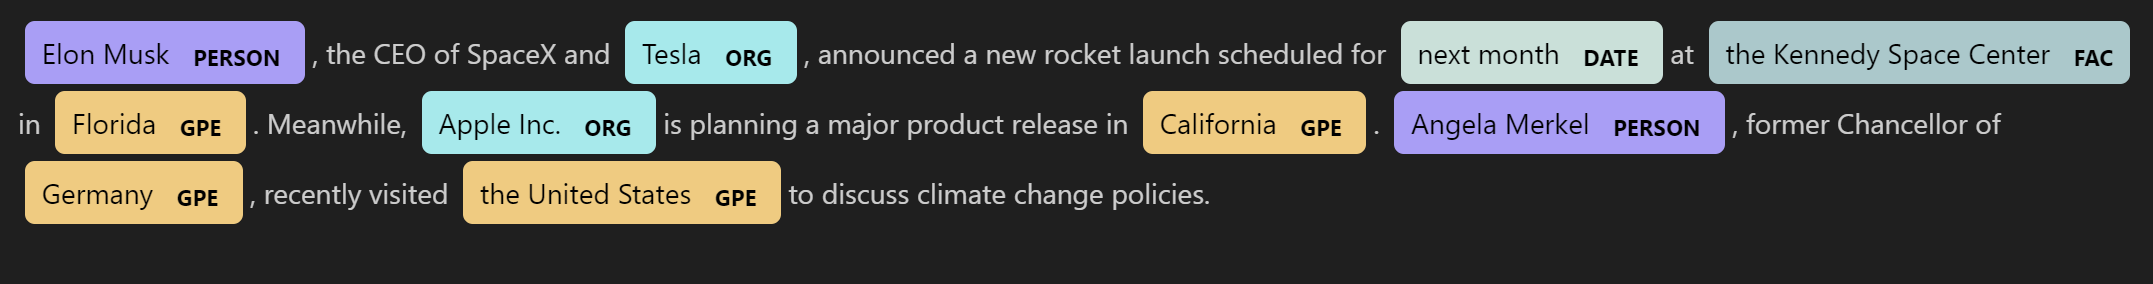


Wyświetl wyniki neuronowe z użyciem kolorów (np inny kolor dla innego typu)


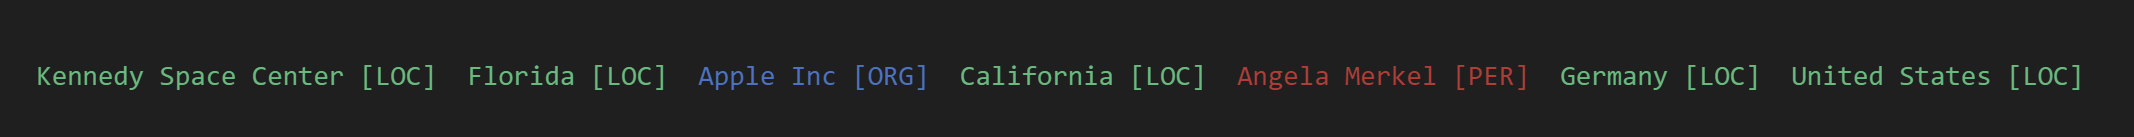








In [17]:
# kod zadania 4
text = "Elon Musk, the CEO of SpaceX and Tesla, announced a new rocket launch scheduled for next month at the Kennedy Space Center in Florida. Meanwhile, Apple Inc. is planning a major product release in California. Angela Merkel, former Chancellor of Germany, recently visited the United States to discuss climate change policies"

In [52]:
import pandas
import torch
import spacy
from transformers import pipeline
from collections import defaultdict
import pandas as pd

class Colors:
    PERSON = '\033[91m'
    ORG = '\033[92m'
    GPE = '\033[93m'
    LOC = '\033[94m'
    MISC = '\033[95m'
    DATE = '\033[96m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    
def get_models():
    nlp = spacy.load("en_core_web_sm")
    bert = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")
    return nlp, bert

def analyse_spacy_ner(text, nlp):
    doc = nlp(text)
    entities = []
    
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'start': ent.start_char,
            'end': ent.end_char,
            'description': spacy.explain(ent.label_)
        })
    
    return entities

def analyse_bert_ner(text, bert):
    results = bert(text)
    entities = []
    
    for entity in results:
        entities.append({
            'text': entity['word'],
            'label': entity['entity_group'],
            'start': entity['start'],
            'end': entity['end'],
            'confidence': entity['score']
        })
    
    return entities

def get_color_for_label(label):
    color_map = {
        'PERSON': Colors.PERSON,
        'PER': Colors.PERSON,
        'ORG': Colors.ORG,
        'GPE': Colors.GPE,
        'LOC': Colors.LOC,
        'MISC': Colors.MISC,
        'DATE': Colors.DATE,
        'TIME': Colors.DATE,
        'MONEY': Colors.MISC,
        'PERCENT': Colors.MISC,
        'CARDINAL': Colors.MISC,
        'ORDINAL': Colors.MISC
    }
    return color_map.get(label.upper(), Colors.MISC)

def display_results(text, entities, model_name):
    entities_sorted = sorted(entities, key=lambda x: x['start'])
    
    colored_text = text
    offset = 0
    
    for entity in entities_sorted:
        start = entity['start'] + offset
        end = entity['end'] + offset
        label = entity['label']
        color = get_color_for_label(label)
        
        colored_part = f"{color}{colored_text[start:end]}({label}){Colors.ENDC}"
        colored_text = colored_text[:start] + colored_part + colored_text[end:]
        offset += len(f"{color}({label}){Colors.ENDC}")
    
    print(colored_text)

def display_entities(entities, model_name):
    table_data = []
    for entity in entities:
        row = {
            'Tekst': entity['text'],
            'Typ': entity['label'],
            'Pozycja': f"{entity['start']}-{entity['end']}"
        }
        if 'confidence' in entity:
            row['Pewność'] = f"{entity['confidence']:.3f}"
        if 'description' in entity:
            row['Opis'] = entity['description']
        table_data.append(row)
    
    df = pd.DataFrame(table_data)
    print(df.to_string(index=False))

In [53]:
text = ("Elon Musk, the CEO of SpaceX and Tesla, announced a new rocket launch "
            "scheduled for next month at the Kennedy Space Center in Florida. "
            "Meanwhile, Apple Inc. is planning a major product release in California. "
            "Angela Merkel, former Chancellor of Germany, recently visited the "
            "United States to discuss climate change policies.")
    
print(text)

nlp, bert_ner = get_models()

print(f"\n{Colors.BOLD}SpaCy{Colors.ENDC}")
spacy_entities = analyse_spacy_ner(text, nlp)
display_results(text, spacy_entities, "SpaCy NER")
display_entities(spacy_entities, "SpaCy")


print(f"\n{Colors.BOLD}BERT{Colors.ENDC}")
bert_entities = analyse_bert_ner(text, bert_ner)
display_results(text, bert_entities, "BERT NER")
display_entities(bert_entities, "BERT")

Elon Musk, the CEO of SpaceX and Tesla, announced a new rocket launch scheduled for next month at the Kennedy Space Center in Florida. Meanwhile, Apple Inc. is planning a major product release in California. Angela Merkel, former Chancellor of Germany, recently visited the United States to discuss climate change policies.


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0



SpaCy
Elon Musk(PERSON), the CEO of SpaceX and Tesla(ORG), announced a new rocket launch scheduled for next month(DATE) at the Kennedy Space Center(FAC) in Florida(GPE). Meanwhile, Apple Inc.(ORG) is planning a major product release in California(GPE). Angela Merkel(PERSON), former Chancellor of Germany(GPE), recently visited the United States(GPE) to discuss climate change policies.
                   Tekst    Typ Pozycja                                         Opis
               Elon Musk PERSON     0-9                  People, including fictional
                   Tesla    ORG   33-38      Companies, agencies, institutions, etc.
              next month   DATE   84-94        Absolute or relative dates or periods
the Kennedy Space Center    FAC  98-122 Buildings, airports, highways, bridges, etc.
                 Florida    GPE 126-133                    Countries, cities, states
              Apple Inc.    ORG 146-156      Companies, agencies, institutions, etc.
              Cal

In [ ]:

]
    


def main():
    text = ("Elon Musk, the CEO of SpaceX and Tesla, announced a new rocket launch "
            "scheduled for next month at the Kennedy Space Center in Florida. "
            "Meanwhile, Apple Inc. is planning a major product release in California. "
            "Angela Merkel, former Chancellor of Germany, recently visited the "
            "United States to discuss climate change policies.")
    
    print(text)
    
    nlp, bert_ner = setup_models()
    if nlp is None:
        return
    
    print(f"\n{Colors.BOLD}SpaCy{Colors.ENDC}")
    spacy_entities = spacy_ner_analysis(text, nlp)
    display_colored_results(text, spacy_entities, "SpaCy NER")
    display_entities_table(spacy_entities, "SpaCy")
    
    if bert_ner is not None:
        print(f"\n{Colors.BOLD}BERT{Colors.ENDC}")
        bert_entities = bert_ner_analysis(text, bert_ner)
        display_colored_results(text, bert_entities, "BERT NER")
        display_entities_table(bert_entities, "BERT")
        

main()

Elon Musk, the CEO of SpaceX and Tesla, announced a new rocket launch scheduled for next month at the Kennedy Space Center in Florida. Meanwhile, Apple Inc. is planning a major product release in California. Angela Merkel, former Chancellor of Germany, recently visited the United States to discuss climate change policies.


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0



SpaCy
Elon Musk(PERSON), the CEO of SpaceX and Tesla(ORG), announced a new rocket launch scheduled for next month(DATE) at the Kennedy Space Center(FAC) in Florida(GPE). Meanwhile, Apple Inc.(ORG) is planning a major product release in California(GPE). Angela Merkel(PERSON), former Chancellor of Germany(GPE), recently visited the United States(GPE) to discuss climate change policies.
                   Tekst    Typ Pozycja                                         Opis
               Elon Musk PERSON     0-9                  People, including fictional
                   Tesla    ORG   33-38      Companies, agencies, institutions, etc.
              next month   DATE   84-94        Absolute or relative dates or periods
the Kennedy Space Center    FAC  98-122 Buildings, airports, highways, bridges, etc.
                 Florida    GPE 126-133                    Countries, cities, states
              Apple Inc.    ORG 146-156      Companies, agencies, institutions, etc.
              Cal